# Thrust to weight ratio

Defined as the maximum static thrust at sea-level divided by the maximum takeoff weight.
If the ratio is less than 1 the craft will not lift off the ground

$\large {\text{TWR}}={\frac {F_{T}}{m g_{0}}}>1$


$F_{T}$ - the thrust of the engines

$m$ - the total mass of the craft

$g_{0}$ - the local gravitational acceleration (on Earth exactly $9.80665 \frac{m}{s^2}$)


In [1]:
import numpy as np

In [2]:
def thrust_to_weight(thrust, mass, g):
    return (thrust) / (mass * g)

---

## Example - launching Falcon 9 from Earth and Mars surface

In [3]:
# Earth gravitational accelleration
G_0 = 9.80665
# Mars gravitational accelleration
M_0 = 3.72076

In [4]:
def volume_to_mass(vol, density):
    """Converts volume in l/s to mass in kg/s"""
    return (vol / 1000) * density

In [5]:
mixture_mass_ratio = 2.36
# weighted average fuel density, assuming density of RP-1 is at the higher end (1.02g/cm^3)
density = ((mixture_mass_ratio * 1141) + (1 * 1020)) / (mixture_mass_ratio + 1)

thrust_1st_stage = 845000
dry_mass_base_1st_stage = 25600
fuel_volume_1st_stage = 398887
fuel_mass_1st_stage = volume_to_mass(fuel_volume_1st_stage, density)

thrust_2nd_stage = 934000
dry_mass_base_2nd_stage = 4000
fuel_volume_2nd_stage = 108185
fuel_mass_2nd_stage = volume_to_mass(fuel_volume_2nd_stage, density)

In [6]:
total_mass_2nd_stage = dry_mass_base_2nd_stage + fuel_mass_2nd_stage
total_mass_1st_stage = dry_mass_base_1st_stage + fuel_mass_1st_stage + total_mass_2nd_stage

In [7]:
engines = np.arange(0, 10)
stage_1 = thrust_to_weight(engines * thrust_1st_stage, total_mass_1st_stage, G_0)
stage_1_M = thrust_to_weight(engines * thrust_1st_stage, total_mass_1st_stage, M_0)
stage_2 = thrust_to_weight(engines * thrust_2nd_stage, total_mass_2nd_stage, G_0)
stage_2_M = thrust_to_weight(engines * thrust_2nd_stage, total_mass_2nd_stage, M_0)

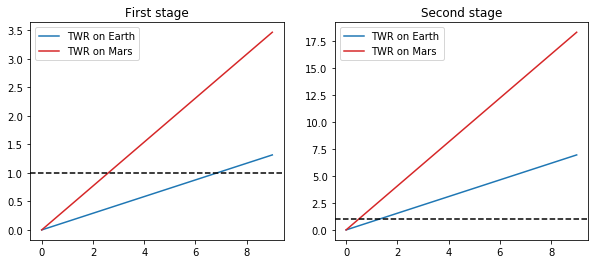

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(engines, stage_1, 'C0', label='TWR on Earth')
ax[0].plot(engines, stage_1_M, 'C3', label='TWR on Mars')
ax[0].set_title('First stage')
ax[0].axhline(1, color='k', linestyle='--')
ax[0].legend()

ax[1].plot(engines, stage_2, 'C0', label='TWR on Earth')
ax[1].plot(engines, stage_2_M, 'C3', label='TWR on Mars')
ax[1].set_title('Second stage')
ax[1].axhline(1, color='k', linestyle='--')
ax[1].legend()

plt.show();

**Observe**

- First stage
    - needs at least 7 engines to lift from Earth surface
    - needs only 3 engines to lift from Mars surface
- Second stage
    - is not able to lift from Earth surface with 1 engine, it would need at least 2-3 engines (assuming lower Isp)
    - there should be no problem with lifting payload from Mars, even with 1 engine

## Sources

- https://en.wikipedia.org/wiki/Thrust-to-weight_ratio
- https://en.wikipedia.org/wiki/Falcon_9
- https://www.reddit.com/r/spacex/comments/3lsm0q/f9ft_vs_f9v11_fuel_mass_flow_rate_isp/
- http://www.spaceflightinsider.com/hangar/falcon/
- http://www.b14643.de/Spacerockets_2/United_States_1/Falcon-9/Merlin/index.htm